# 의류 판매 상품 리뷰 분석을 통한 상품 추천 여부 예측

### 데이터 출처 
### - https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 1. 데이터 로드
df = pd.read_csv("./Womens Clothing E-Commerce Reviews.csv")

# 5개의 데이터 샘플 출력
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
# 칼럼 출력
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [4]:
# dataframe의 정보 출력
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [5]:
# 수치형 변수의 데이터 정보 출력
df.describe()

,Unnamed: 0,Clothing ID,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,918.118709,43.198544,4.196032,0.822362,2.535936
std,6779.968547,203.298980,12.279544,1.110031,0.382216,5.702202
min,0.000000,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,861.000000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,936.000000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,1078.000000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,1205.000000,99.000000,5.000000,1.000000,122.000000


In [6]:
# 불필요한 칼럼인 'Unnamed: 0' 삭제
df= df.drop(columns = ['Unnamed: 0'],axis=1)

In [7]:
# 2. 데이터 정제
# 2.1. 결측값 확인
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [8]:
# 2.2. 결측값 처리
# Review Text만 사용할 예정이기 때문에 이 칼럼만 처리
df = df[~df['Review Text'].isnull()]

In [9]:
# 결측값 정보를 출력
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      2966
Review Text                   0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                13
Department Name              13
Class Name                   13
dtype: int64

In [10]:
# 3. 데이터 시각화
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from collections import Counter
from nltk.tokenize import RegexpTokenizer
import re

In [11]:
# 3.1. `Title` word cloud
# 'Title' 결측값 제거
df = df[~df['Title'].isnull()]

# 띄어 쓰기 단위로 글자만 가져오기, 소문자로 변경
tokens = re.findall("[\w']+", df['Title'].str.lower().str.cat(sep=' ')) 

In [12]:
tokens

['some',
 'major',
 'design',
 'flaws',
 'my',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'not',
 'for',
 'the',
 'very',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'with',
 'lots',
 'flattering',
 'such',
 'a',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 "it's",
 'made',
 'of',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'with',
 'some',
 'issues',
 'nice',
 'but',
 'not',
 'for',
 'my',
 'body',
 'you',
 'need',
 'to',
 'be',
 'at',
 'least',
 'average',
 'height',
 'or',
 'taller',
 'looks',
 'great',
 'with',
 'white',
 'pants',
 'super',
 'cute',
 'and',
 'cozy',
 'stylish',
 'and',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 "i'm",
 'torn',
 'not',
 'what',
 'it',
 'looks',
 'like',
 'like',
 'it',
 'but',
 "don't",
 'love',
 'it',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'but',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'in',


In [13]:
# stopwords' 다운
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HJ\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
# 영어 'stopwords' 가져오기
en_stops = set(stopwords.words('english'))

# 'stopwords'에 해당되지 않는 단어를 filtered_sentence에 저장
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['major',
 'design',
 'flaws',
 'favorite',
 'buy',
 'flattering',
 'shirt',
 'petite',
 'cagrcoal',
 'shimmer',
 'fun',
 'shimmer',
 'surprisingly',
 'goes',
 'lots',
 'flattering',
 'fun',
 'dress',
 'dress',
 'looks',
 'like',
 'made',
 'cheap',
 'material',
 'perfect',
 'runs',
 'big',
 'pretty',
 'party',
 'dress',
 'issues',
 'nice',
 'body',
 'need',
 'least',
 'average',
 'height',
 'taller',
 'looks',
 'great',
 'white',
 'pants',
 'super',
 'cute',
 'cozy',
 'stylish',
 'comfortable',
 'cute',
 'crisp',
 'shirt',
 "i'm",
 'torn',
 'looks',
 'like',
 'like',
 'love',
 'versatile',
 'falls',
 'flat',
 'huge',
 'disappointment',
 'loved',
 'returned',
 'great',
 'shirt',
 'great',
 'layering',
 'piece',
 'cuter',
 'oerson',
 'love',
 'pants',
 'mehh',
 'love',
 'dress',
 'lovely',
 'beautifully',
 'cut',
 'lightweight',
 'coat',
 'soft',
 'lovely',
 'things',
 'know',
 'beautiful',
 'love',
 'two',
 'tone',
 'design',
 'love',
 'color',
 'love',
 'embroidery',
 'cute',
 'fall',


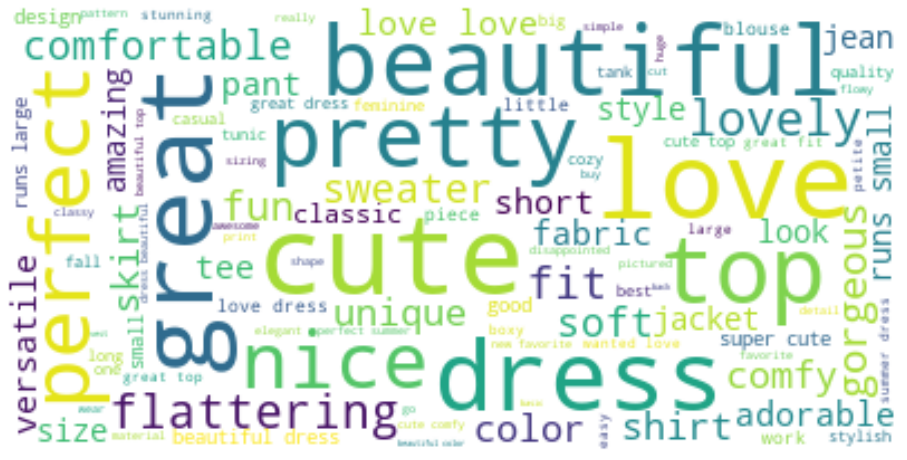

In [15]:
# 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud를 저장
wordcloud = WordCloud(max_font_size=50, max_words=100,background_color="white").generate(' '.join(filtered_sentence))

# wordcloud 출력
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [16]:
# 3.2. `Review Text` word cloud
# 띄어 쓰기 단위로 글자만을 가져오기, 소문자로 변경
tokens = re.findall("[\w']+", df['Review Text'].str.lower().str.cat(sep=' ')) 

# 'stopwords'에 해당되지 않는 단어를 filtered_sentence에 저장
filtered_sentence = [token for token in tokens if not token in en_stops]
filtered_sentence

['high',
 'hopes',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layers',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliments',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'leggings',
 'sleeveless',
 'pairs',
 'well',
 'cardigan',
 'love',
 'shirt',
 'love',
 'tracy',
 'reese',
 'dresses',
 'one',
 'petite',
 '5',
 'feet',
 'tall',
 'usually',
 'wear',
 '0p',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt'

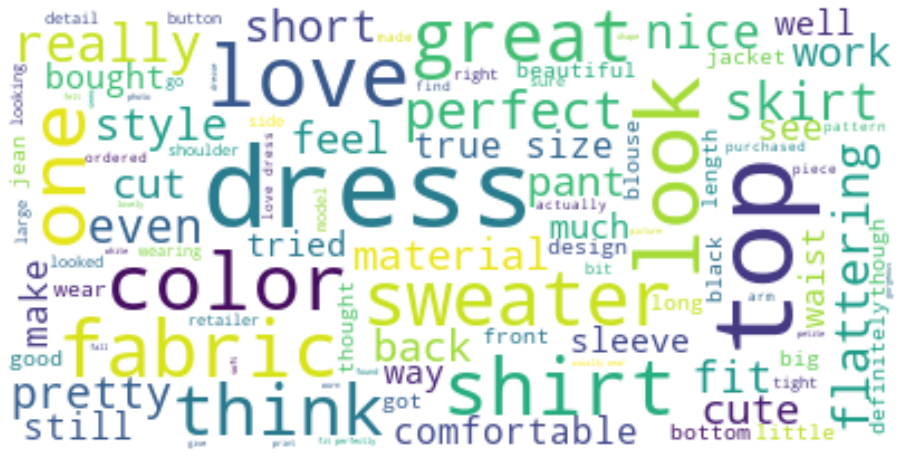

In [17]:
# 출력 사이즈 설정
plt.rcParams['figure.figsize'] = (16, 16)

# wordcloud 저장
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(filtered_sentence))

# wordcloud 출력
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

1    16100
0     3575
Name: Recommended IND, dtype: int64

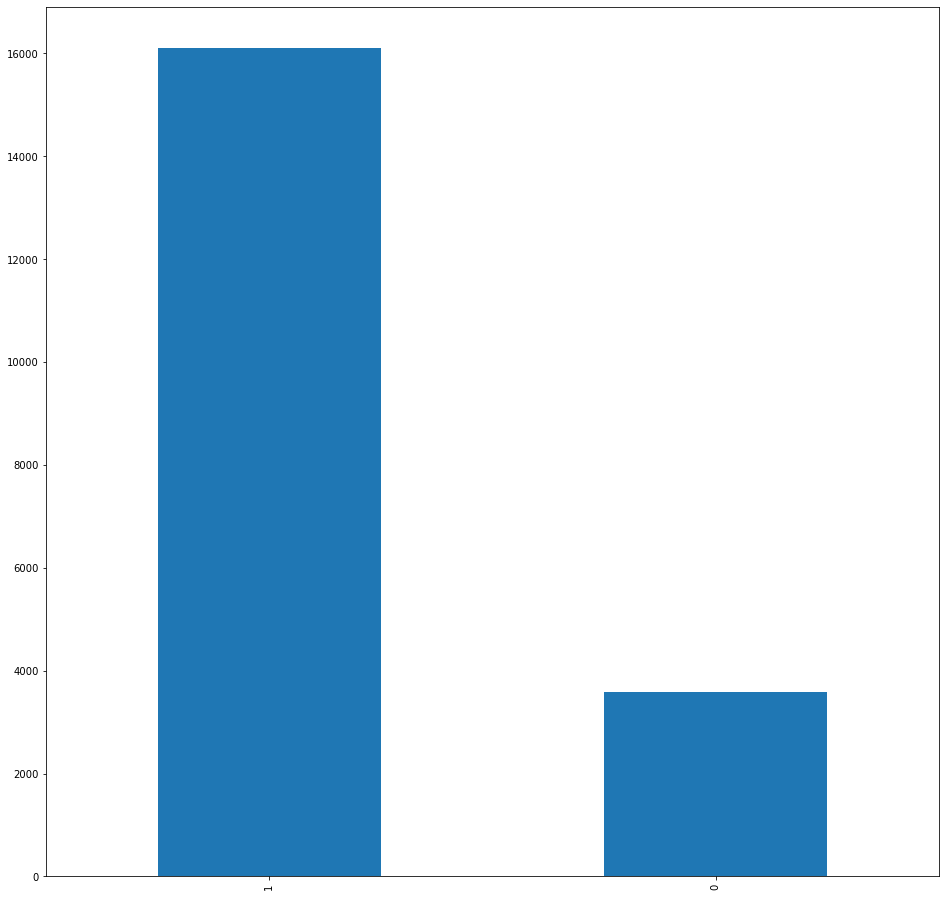

In [18]:
# 3.3. `Recommended IND` 시각화
# 분포를 막대 그래프를 사용해 출력
df['Recommended IND'].value_counts().plot(kind='bar')

# 분포를 도수분포표로 확인
df['Recommended IND'].value_counts()

In [19]:
# 4. 데이터 전 처리
# 4.1. `Review Text` 데이터 자연어 전 처리 - Tfidf

from sklearn.feature_extraction.text import TfidfVectorizer

# TfidfVectorizer 불러오기 (stop_words 영어로 설정)
vectorizer = TfidfVectorizer(stop_words = 'english')

# 소문자화 'Review Text'데이터를 Tfidf로 변환.
X = vectorizer.fit_transform(df['Review Text'].str.lower())

In [20]:
# 변환된 X의 크기
X.shape

(19675, 13287)

In [21]:
# 예측해야 할 변수 'Recommended IND'를 numpy 형태로 y에 저장
y = df['Recommended IND']
y = y.to_numpy()# 1 차원 벡터 형태로 출력하기 위해 ravel 사용
y.ravel

<function ndarray.ravel>

In [22]:
# 4.2. 학습, 테스트 데이터 분리
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [23]:
# 5. 머신러닝 모델 학습
# 5.1. DecisionTree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [24]:
# score 함수를 사용하여 모델의 성능 출력
print(model.score(x_train, y_train))
print(model.score(x_test, y_test))

1.0
0.8101651842439644


In [25]:
# 5.2. 다양한 분류 모델 학습
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from xgboost.sklearn import XGBClassifier

In [26]:
models = []
models.append(('KNN', KNeighborsClassifier()))  # KNN 모델
models.append(('NB-M', MultinomialNB()))  # 멀티노미얼 나이브 베이즈
models.append(('NB-B', BernoulliNB()))  # 베르누이 나이브 베이즈 모델
models.append(('RF', RandomForestClassifier()))  # 랜덤포레스트 모델
models.append(('SVM', SVC(gamma='auto')))  # SVM 모델
models.append(('XGB', XGBClassifier()))  # XGB 모델

In [ ]:
for name, model in models:
    model.fit(x_train, y_train)
    models_scores = "%s - train_score : %f, test score : %f" % (name, model.score(x_train, y_train), model.score(x_test, y_test))
    print(msg)

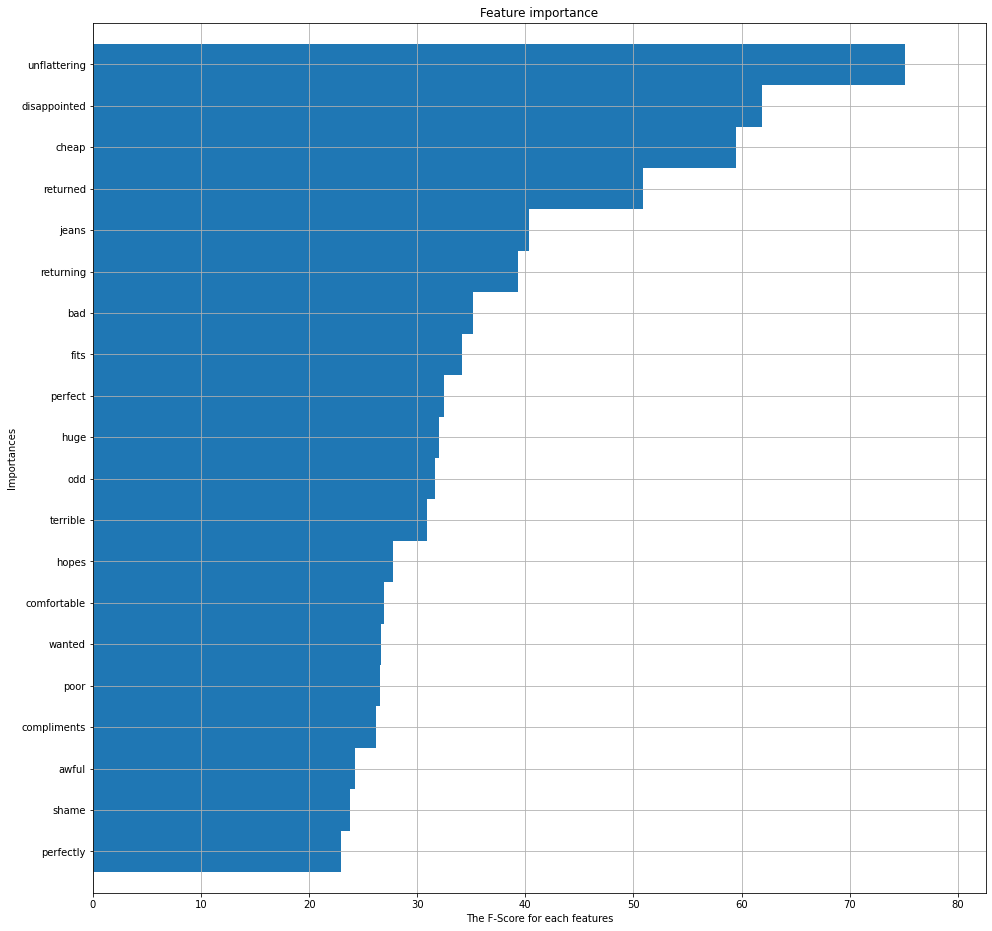

In [28]:
# xgb 모델에서 변수 중요도 출력
max_num_features = 20
ax = xgb.plot_importance(models[-1][1], height = 1, grid = True, importance_type = 'gain', show_values = False, max_num_features = max_num_features)
ytick = ax.get_yticklabels()
word_importance = []
for i in range(max_num_features):
    word_importance.append(vectorizer.get_feature_names()[int(ytick[i].get_text().split('f')[1])])

ax.set_yticklabels(word_importance)

plt.rcParams['figure.figsize'] = (10, 15)
plt.xlabel('The F-Score for each features')
plt.ylabel('Importances')
plt.show()

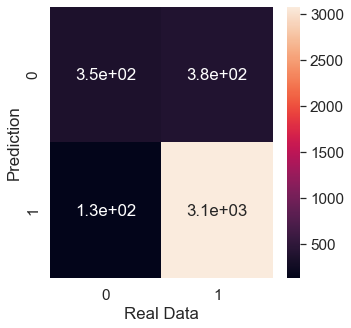

In [31]:
# 6. 평가 및 예측
# 6.1. Confusion Matrix
from sklearn.metrics import confusion_matrix

# 의사결정나무 모델에 confusion matrix를 사용하기 위해 테스트 데이터의 예측값 저장
model_predition = model.predict(x_test)
cm = confusion_matrix(y_test, model_predition)

plt.rcParams['figure.figsize'] = (5, 5)
sns.set(style = 'dark', font_scale = 1.4)
ax = sns.heatmap(cm, annot=True)
plt.xlabel('Real Data')
plt.ylabel('Prediction')
plt.show()

In [44]:
# 6.2. Precision & Recall
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
print("Recall score   : {:.2f}".format(recall_score(y_test, model_predition)))
print("Precision score: {:.2f}".format(precision_score(y_test, model_predition)))

Recall score   : 0.96
Precision score: 0.89
